In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
print("No of passanger "+str(len(titanic_data)))

No of passanger 891


### Analyse the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

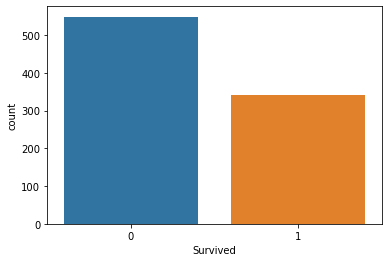

In [208]:
sns.countplot(x="Survived",data = titanic_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

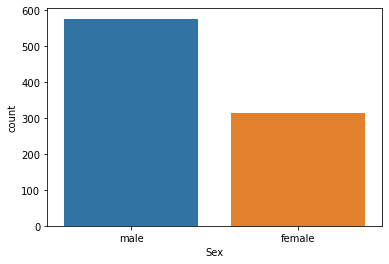

In [209]:
sns.countplot(x="Sex",data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

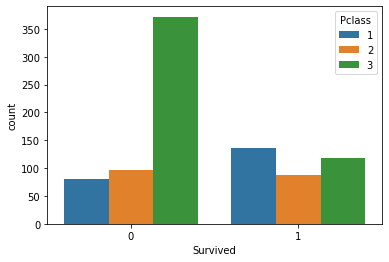

In [210]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

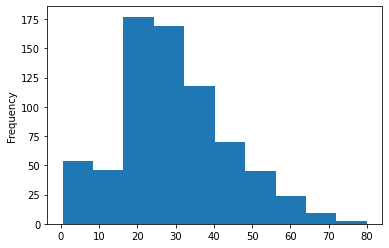

In [211]:
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

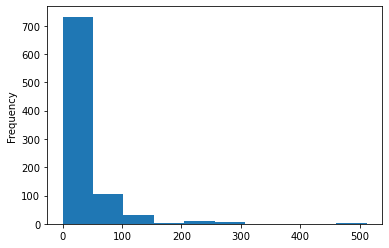

In [212]:
titanic_data["Fare"].plot.hist()

### Data Wrangling

In [213]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [214]:
sex=pd.get_dummies(titanic_data["Sex"],drop_first="True")
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [215]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
X = titanic_data.drop(['Pclass','PassengerId','Name','Sex','Ticket','Embarked','Cabin'],axis=1,inplace=True)
titanic_data
titanic_data['Age'] = titanic_data['Age'].replace(np.nan, 0)

### Train Dataset

In [217]:
X = titanic_data.drop('Survived',axis=1)
y=titanic_data["Survived"]


In [218]:
from sklearn.model_selection import train_test_split


In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [220]:
from sklearn.linear_model import LogisticRegression

In [221]:
logModel= LogisticRegression()

In [225]:
logModel.fit(X_train,y_train)

LogisticRegression()

In [227]:
prediction = logModel.predict(X_test)

In [229]:
from sklearn.metrics import classification_report

In [231]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.63      0.92      0.75       174\n           1       0.67      0.24      0.35       121\n\n    accuracy                           0.64       295\n   macro avg       0.65      0.58      0.55       295\nweighted avg       0.65      0.64      0.59       295\n'

In [234]:
from sklearn.metrics import confusion_matrix


In [236]:
confusion_matrix(y_test,prediction)

array([[160,  14],
       [ 92,  29]], dtype=int64)

In [237]:
from sklearn.metrics import accuracy_score

In [239]:
accuracy_score(y_test,prediction)

0.6406779661016949